In [1]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

print(tf.__version__)


2.7.0


In [2]:
datasetfilename = 'numandataset.npz'

with np.load(datasetfilename, allow_pickle=True) as data:
    dataImages = data['images']
    dataLabel = data['labels']
    dataLabelNames = data['labelnames']
    
print(dataImages.shape)
print(dataLabel.shape)
print(dataLabelNames.shape)

(36,)
(36,)
(36,)


In [3]:
dataImages.dtype, dataLabel.dtype, dataLabelNames.dtype

(dtype('O'), dtype('int32'), dtype('<U10'))

In [4]:
print(len(dataLabel))
print(dataLabel)
print(dataLabelNames)

36
[0 1 2 3 4 5 6 7 8 1 2 4 6 7 8 1 2 3 4 5 6 7 0 1 4 5 6 7 8 0 1 4 5 6 7 8]
['afiq' 'azureen' 'gavin' 'goke' 'inamul' 'jincheng' 'mahmuda' 'numan'
 'saseendran' 'azureen' 'gavin' 'inamul' 'mahmuda' 'numan' 'saseendran'
 'azureen' 'gavin' 'goke' 'inamul' 'jincheng' 'mahmuda' 'numan' 'afiq'
 'azureen' 'inamul' 'jincheng' 'mahmuda' 'numan' 'saseendran' 'afiq'
 'azureen' 'inamul' 'jincheng' 'mahmuda' 'numan' 'saseendran']


In [5]:
classNames = sorted(np.unique(dataLabelNames))
classLabels = sorted(np.unique(dataLabel))

print(classNames)
print(classLabels)

['afiq', 'azureen', 'gavin', 'goke', 'inamul', 'jincheng', 'mahmuda', 'numan', 'saseendran']
[0, 1, 2, 3, 4, 5, 6, 7, 8]


In [6]:
import cv2 as cv

N = len(dataImages)
shape = (N, 200,200,3)

y = np.empty(shape, dtype='uint8')

for i in range(N):
    y[i] = cv.resize(dataImages[i], [200,200], interpolation=cv.INTER_NEAREST)
    
dataImages.dtype, y.dtype, y.shape

dataImages = y

In [7]:
# Split the data to train and test
trainImages, testImages, trainLabels, testLabels = train_test_split(dataImages, dataLabel, test_size=0.3, random_state=42)

print(dataImages.shape)
print(dataLabel)

print(trainImages.shape)
print(testImages.shape)
print(testLabels)

(36, 200, 200, 3)
[0 1 2 3 4 5 6 7 8 1 2 4 6 7 8 1 2 3 4 5 6 7 0 1 4 5 6 7 8 0 1 4 5 6 7 8]
(25, 200, 200, 3)
(11, 200, 200, 3)
[8 7 6 1 2 4 7 6 8 3 1]


In [8]:
# classNames = sorted(np.unique(dataLabelNames))
# dataLabel[0]

In [9]:
# plt.figure()

# i = 0
# plt.imshow(trainImages[i])
# plt.title(f'{trainLabels[i]}')
# # plt.xlabel(classNames[dataLabel[i]])
# plt.show()

In [10]:
import numpy as np

print(trainImages[0].shape)
print(trainImages[1].shape)

(200, 200, 3)
(200, 200, 3)


In [11]:
for i in range(len(trainImages)):
    trainImages[i] = cv.resize(trainImages[i], [200,200], interpolation=cv.INTER_NEAREST)


In [12]:
inputShape = trainImages[0].shape
outputShape = len(classNames)

inputShape, outputShape

((200, 200, 3), 9)

In [13]:
trainImages = trainImages / 255
testImages = testImages / 255

In [14]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=inputShape),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(outputShape)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 120000)            0         
                                                                 
 dense (Dense)               (None, 128)               15360128  
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 128)               1

In [15]:
model.compile(optimizer='adam', loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [16]:
model.fit(trainImages, trainLabels, epochs=40)

Epoch 1/40
1/1 [==============================] - 1s 504ms/step - loss: 2.1925 - accuracy: 0.0800
Epoch 2/40
1/1 [==============================] - 0s 111ms/step - loss: 5.5816 - accuracy: 0.1200
Epoch 3/40
1/1 [==============================] - 0s 114ms/step - loss: 7.7956 - accuracy: 0.1600
Epoch 4/40
1/1 [==============================] - 0s 118ms/step - loss: 5.3045 - accuracy: 0.2800
Epoch 5/40
1/1 [==============================] - 0s 121ms/step - loss: 6.5408 - accuracy: 0.2400
Epoch 6/40
1/1 [==============================] - 0s 121ms/step - loss: 3.9817 - accuracy: 0.2400
Epoch 7/40
1/1 [==============================] - 0s 111ms/step - loss: 2.7984 - accuracy: 0.3200
Epoch 8/40
1/1 [==============================] - 0s 119ms/step - loss: 3.6145 - accuracy: 0.2800
Epoch 9/40
1/1 [==============================] - 0s 120ms/step - loss: 4.2016 - accuracy: 0.2400
Epoch 10/40
1/1 [==============================] - 0s 116ms/step - loss: 3.3952 - accuracy: 0.3600
Epoch 11/40
1/1 [==

In [17]:
testLoss, testAcc = model.evaluate(testImages, testLabels, verbose=2)

print('\nTest accuracy:', testAcc)

1/1 - 0s - loss: 0.2049 - accuracy: 0.9091 - 173ms/epoch - 173ms/step

Test accuracy: 0.9090909361839294


In [18]:
predictions = model.predict(testImages)
predictions[0]

array([ 1.2230016 ,  0.5963226 ,  5.6842456 ,  3.3741472 , -6.3541636 ,
       -0.63323045,  6.0406466 , -7.598054  , 10.721634  ], dtype=float32)

8 8 True
7 7 True
6 6 True
1 1 True
2 2 True
4 4 True
7 7 True
6 6 True
8 8 True
1 3 False
1 1 True
{0: 'afiq', 1: 'azureen', 2: 'gavin', 3: 'goke', 4: 'inamul', 5: 'jincheng', 6: 'mahmuda', 7: 'numan', 8: 'saseendran'}


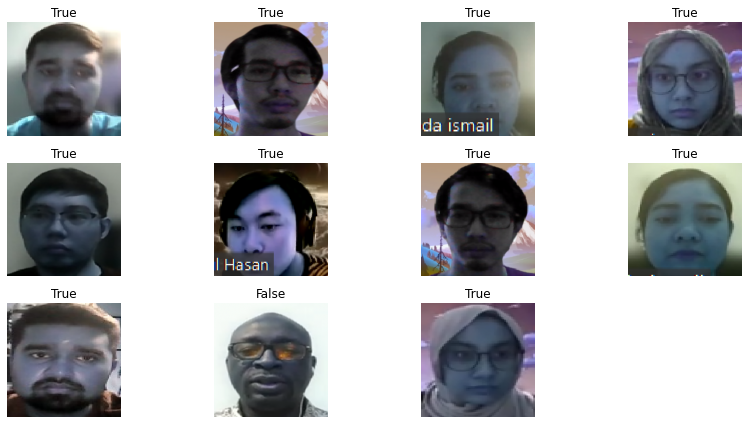

In [19]:
ix_names = dict(zip(classLabels, classNames))

a,b = 3,4
count = 1
plt.figure(figsize=(12,6))

for i in range(len(testImages)):
    predictedLabel = np.argmax(predictions[i])
    print(predictedLabel, testLabels[i], predictedLabel == testLabels[i])
    
    plt.subplot(a,b,count)
    plt.imshow(testImages[i])
    plt.axis('off') 
    plt.title(predictedLabel == testLabels[i])
    count+=1
    
print(ix_names)
plt.tight_layout()
plt.show()